In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')
test = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/test_V2.csv')


# EDA및 전처리

데이터 살펴보기

In [4]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
train.head()

Train data shape: (4446966, 29)
Test data shape: (1934174, 28)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

각종 id와 matchType만 문자열변수  
나머지는 정수형 변수  
id 속성들은 삭제, matchType는이후에 처리

In [4]:
train.describe()


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


결측치 처리

In [3]:
print("Missing values in train data:\n", train.isnull().sum().sort_values(ascending=False).head(10))
print("Missing values in test data:\n", test.isnull().sum().sort_values(ascending=False).head(10))

Missing values in train data:
 winPlacePerc       1
matchType          0
winPoints          0
weaponsAcquired    0
walkDistance       0
vehicleDestroys    0
teamKills          0
swimDistance       0
roadKills          0
rideDistance       0
dtype: int64
Missing values in test data:
 Id                 0
groupId            0
weaponsAcquired    0
walkDistance       0
vehicleDestroys    0
teamKills          0
swimDistance       0
roadKills          0
rideDistance       0
revives            0
dtype: int64


In [44]:
train = train.dropna(subset=['winPlacePerc'])

In [20]:
print("Missing values in train data:\n", train.isnull().sum().sort_values(ascending=False).head(10))

Missing values in train data:
 Id                 0
matchType          0
winPoints          0
weaponsAcquired    0
walkDistance       0
vehicleDestroys    0
teamKills          0
swimDistance       0
roadKills          0
rideDistance       0
dtype: int64


### 이후 EDA및 전처리에서는 베이스라인 모델의 성능을 기준으로 결정함

### 타깃값의 분포

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


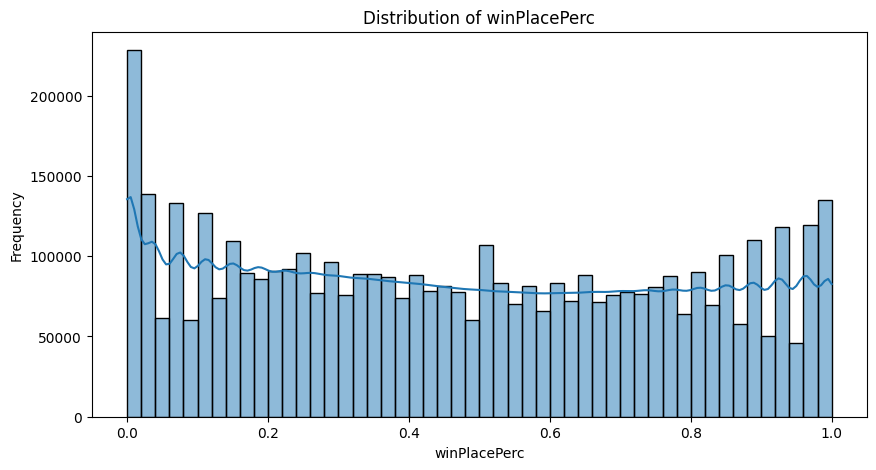

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(train['winPlacePerc'], bins=50, kde=True)
plt.title("Distribution of winPlacePerc")
plt.xlabel("winPlacePerc")
plt.ylabel("Frequency")
plt.show()

상위권과 하위권의 성적을 기록한 데이터가 많음 [0.2,0.8]의 값들은 상대적으로 균일한 값을 보임

### 3가지 랭크 포인트 변수들 살펴보기

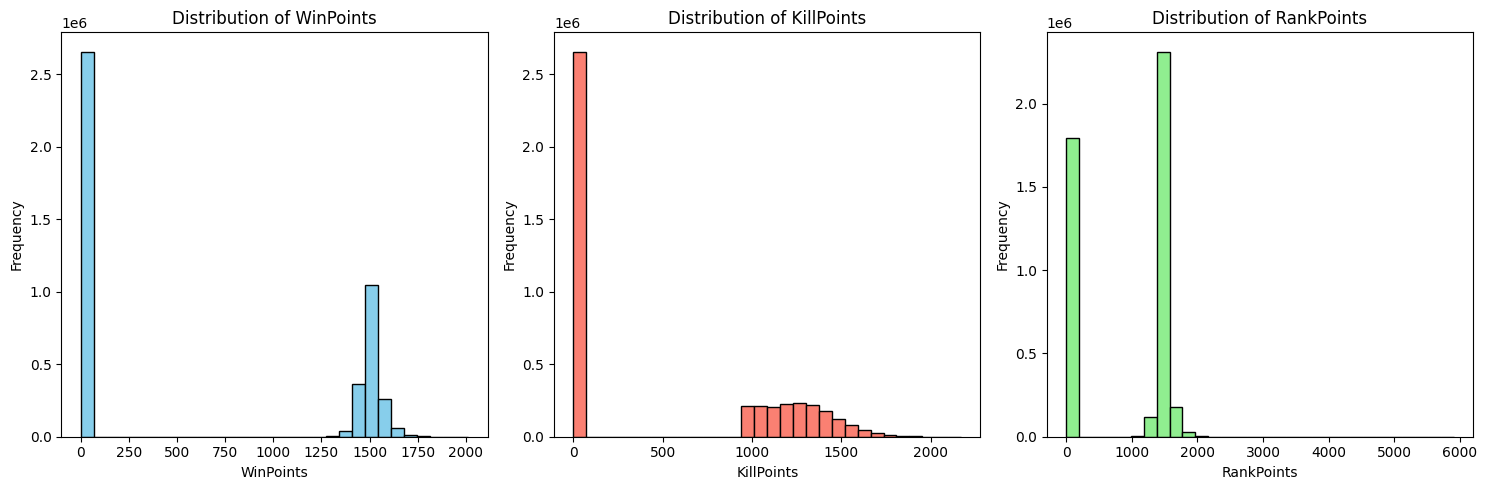

In [22]:
numeric_train = train.select_dtypes(include=[np.number])

# 세 가지 변수의 분포를 시각화
plt.figure(figsize=(15, 5))

# WinPoints 분포
plt.subplot(1, 3, 1)
plt.hist(numeric_train['winPoints'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of WinPoints")
plt.xlabel("WinPoints")
plt.ylabel("Frequency")

# KillPoints 분포
plt.subplot(1, 3, 2)
plt.hist(numeric_train['killPoints'], bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of KillPoints")
plt.xlabel("KillPoints")
plt.ylabel("Frequency")

# RankPoints 분포
plt.subplot(1, 3, 3)
plt.hist(numeric_train['rankPoints'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of RankPoints")
plt.xlabel("RankPoints")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

대부분의 플레이어가 point가 0인상태여서 상관계수가 낮게 나옴

In [6]:
train['is_zero_winPoints'] = (train['winPoints'] == 0).astype(int)
train['is_zero_killPoints'] = (train['killPoints'] == 0).astype(int)
train['is_zero_rankPoints'] = (train['rankPoints'] == 0).astype(int)


In [7]:
# 로그 변환 (0을 제외한 나머지 값들만)
train['winPoints_log'] = train['winPoints'].apply(lambda x: np.log1p(x) if x > 0 else 0)
train['killPoints_log'] = train['killPoints'].apply(lambda x: np.log1p(x) if x > 0 else 0)
train['rankPoints_log'] = train['rankPoints'].apply(lambda x: np.log1p(x) if x > 0 else 0)

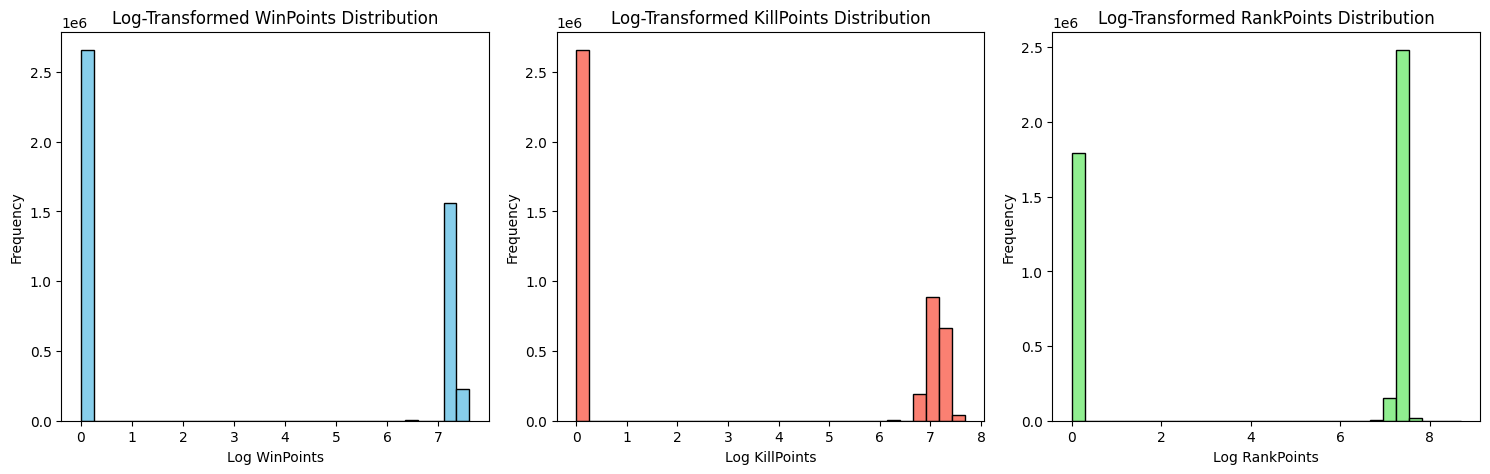

In [8]:
# 로그 변환 후 분포 시각화
plt.figure(figsize=(15, 5))

# WinPoints 로그 분포
plt.subplot(1, 3, 1)
plt.hist(train['winPoints_log'], bins=30, color='skyblue', edgecolor='black')
plt.title("Log-Transformed WinPoints Distribution")
plt.xlabel("Log WinPoints")
plt.ylabel("Frequency")

# KillPoints 로그 분포
plt.subplot(1, 3, 2)
plt.hist(train['killPoints_log'], bins=30, color='salmon', edgecolor='black')
plt.title("Log-Transformed KillPoints Distribution")
plt.xlabel("Log KillPoints")
plt.ylabel("Frequency")

# RankPoints 로그 분포
plt.subplot(1, 3, 3)
plt.hist(train['rankPoints_log'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Log-Transformed RankPoints Distribution")
plt.xlabel("Log RankPoints")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

feature engineering 전: 0.1455938048336897  
feature engineering 후: 0.1453942942496193  

-> feature engineering 이후 성능 감소

### killPlace와winPlacePerc의 관계

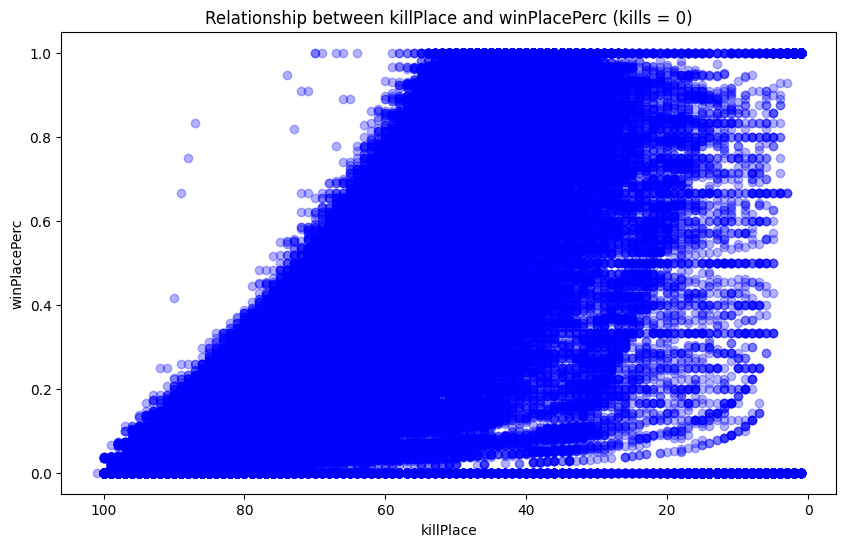

In [47]:
# kills가 0인 그룹에서 killPlace와 winPlacePerc의 관계를 시각화
sample_data = train[train['kills'] == 0]

# killPlace와 winPlacePerc의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['killPlace'], sample_data['winPlacePerc'], alpha=0.3, color='blue')
plt.title("Relationship between killPlace and winPlacePerc (kills = 0)")
plt.xlabel("killPlace")
plt.ylabel("winPlacePerc")
plt.gca().invert_xaxis()  # killPlace 순서가 낮을수록 높은 순위이므로 축 반전
plt.show()

In [45]:
train = train.drop(columns=['killPlace'])
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,1241,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,0,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,1029,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,0,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


-> 같은 kill을 기록해도 최종 순위가 높으면 높은 kill순위로 기록됨  
해당 속성은 타깃 데이터가  유출되어 적용되는 속성으로 삭제 처리


### Match Type별로 데이터 구분하여 학습 진행하기  
solo, duo, squad는 플레이 특성이 다르기 때문에 다른 데이터로 분류


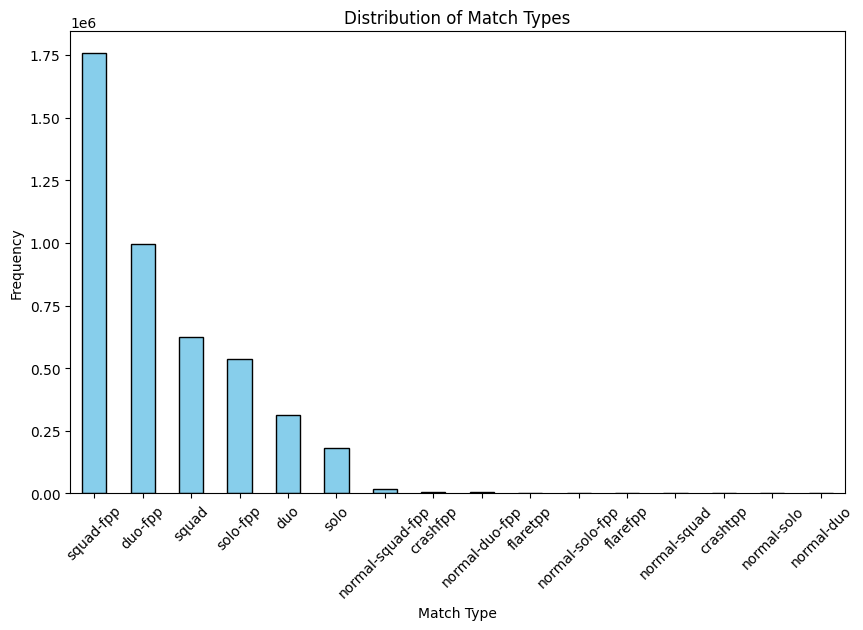

In [34]:
plt.figure(figsize=(10, 6))
train['matchType'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Match Types")
plt.xlabel("Match Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [46]:
# 상위 6개의 matchType 항목을 가진 데이터만 남기기
top_6_match_types_list = train['matchType'].value_counts().nlargest(6).index
train_top_6_match_types = train[train['matchType'].isin(top_6_match_types_list)]

# 결과 확인
print(train_top_6_match_types['matchType'].value_counts())

matchType
squad-fpp    1756186
duo-fpp       996691
squad         626526
solo-fpp      536761
duo           313591
solo          181943
Name: count, dtype: int64


### 팀원 멤버의수 속성추가

In [47]:
train['team_size'] = train.groupby(['matchId', 'groupId'])['Id'].transform('count')

# 같은 팀에 속한 팀원 수 확인
train[['matchId', 'groupId', 'Id', 'team_size']].drop_duplicates().head(10)

,matchId,groupId,Id,team_size
0,a10357fd1a4a91,4d4b580de459be,7f96b2f878858a,4
1,aeb375fc57110c,684d5656442f9e,eef90569b9d03c,4
2,110163d8bb94ae,6a4a42c3245a74,1eaf90ac73de72,2
3,f1f1f4ef412d7e,a930a9c79cd721,4616d365dd2853,1
4,6dc8ff871e21e6,de04010b3458dd,315c96c26c9aac,1
5,bac52627a12114,289a6836a88d27,ff79c12f326506,10
6,a8274e903927a2,2c485a1ad3d0f1,95959be0e21ca3,6
7,292611730ca862,eaba5fcb7fc1ae,311b84c6ff4390,1
8,df014fbee741c6,47cfbb04e1b1a2,1a68204ccf9891,3
9,3d3031c795305b,759bb6f7514fd2,e5bb5a43587253,3


속성 추가 전: 0.1487116553644863  
속성 추가 후: 0.1455938048336897  
-> 속성 추가 후 성능 향상

In [48]:
train = train.drop(columns=['Id', 'groupId', 'matchId'])
train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,team_size
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,4
1,0,0,91.47,0,0,0,0,0,0,0.00,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,4
2,1,0,68.00,0,0,0,0,0,0,0.00,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,2
3,0,0,32.90,0,0,0,0,0,0,0.00,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,1
4,0,0,100.00,0,0,0,0,1,1,58.53,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,5
4446962,0,1,44.15,0,0,0,0,0,0,0.00,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,1
4446963,0,0,59.06,0,0,0,0,0,0,0.00,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,3
4446964,0,4,180.40,1,1,2,0,2,1,98.50,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,4


In [49]:
#데이터 전처리 과정이 남았기에 마지막에 분리 진행

# Solo 데이터
solo_types = ['solo', 'solo-fpp']
solo_train = train[train['matchType'].isin(solo_types)]

# Duo 데이터
duo_types = ['duo', 'duo-fpp']
duo_train = train[train['matchType'].isin(duo_types)]

# Squad 데이터
squad_types = ['squad', 'squad-fpp']
squad_train = train[train['matchType'].isin(squad_types)]

# 결과 확인
print("Solo 데이터 개수:", len(solo_train))
print("Duo 데이터 개수:", len(duo_train))
print("Squad 데이터 개수:", len(squad_train))

# Solo 테스트 데이터 (matchType에 'solo' 포함)
solo_test = test[test['matchType'].str.contains('solo')]

# Duo 테스트 데이터 (matchType에 'duo' 포함)
duo_test = test[test['matchType'].str.contains('duo')]

# Squad 테스트 데이터 (solo, duo에 포함되지 않는 나머지)
squad_test = test[~test['matchType'].str.contains('solo|duo')]

# 결과 확인
print("Solo 테스트 데이터 개수:", len(solo_test))
print("Duo 테스트 데이터 개수:", len(duo_test))
print("Squad 테스트 데이터 개수:", len(squad_test))

Solo 데이터 개수: 718704
Duo 데이터 개수: 1310282
Squad 데이터 개수: 2382712
Solo 테스트 데이터 개수: 313924
Duo 테스트 데이터 개수: 584286
Squad 테스트 데이터 개수: 1035964


In [29]:
#타입 안나누는 버전
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['matchType'] = label_encoder.fit_transform(train['matchType'])

타입 안나눔 RMSE: 0.1490401470357867  
타입 나눔 RMSE: 0.1453942942496193



In [37]:
duo_train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,weaponsAcquired,winPoints,winPlacePerc,is_zero_winPoints,is_zero_killPoints,is_zero_rankPoints,winPoints_log,killPoints_log,rankPoints_log,team_size


타깃값과의 상관관계분석

In [13]:
# 숫자형 열만 선택
numeric_train = train.select_dtypes(include=[np.number])

# 타깃 변수 'winPlacePerc'와 나머지 숫자형 변수 간의 상관관계 계산
target_corr = numeric_train.corr()['winPlacePerc'].sort_values(ascending=False)

# 결과 출력
target_corr

winPlacePerc          1.000000
walkDistance          0.810888
boosts                0.634234
weaponsAcquired       0.583806
damageDealt           0.440507
heals                 0.427857
kills                 0.419916
longestKill           0.410154
killStreaks           0.377566
rideDistance          0.342915
assists               0.299441
DBNOs                 0.279970
headshotKills         0.277722
revives               0.240881
swimDistance          0.149607
vehicleDestroys       0.073436
numGroups             0.039621
maxPlace              0.037377
roadKills             0.034544
teamKills             0.015943
rankPoints            0.013523
killPoints            0.012908
winPoints             0.007061
rankPoints_log        0.003119
is_zero_winPoints     0.001412
is_zero_killPoints    0.001412
killPoints_log        0.000797
winPoints_log        -0.000141
is_zero_rankPoints   -0.001092
matchDuration        -0.005171
team_size            -0.293109
Name: winPlacePerc, dtype: float64

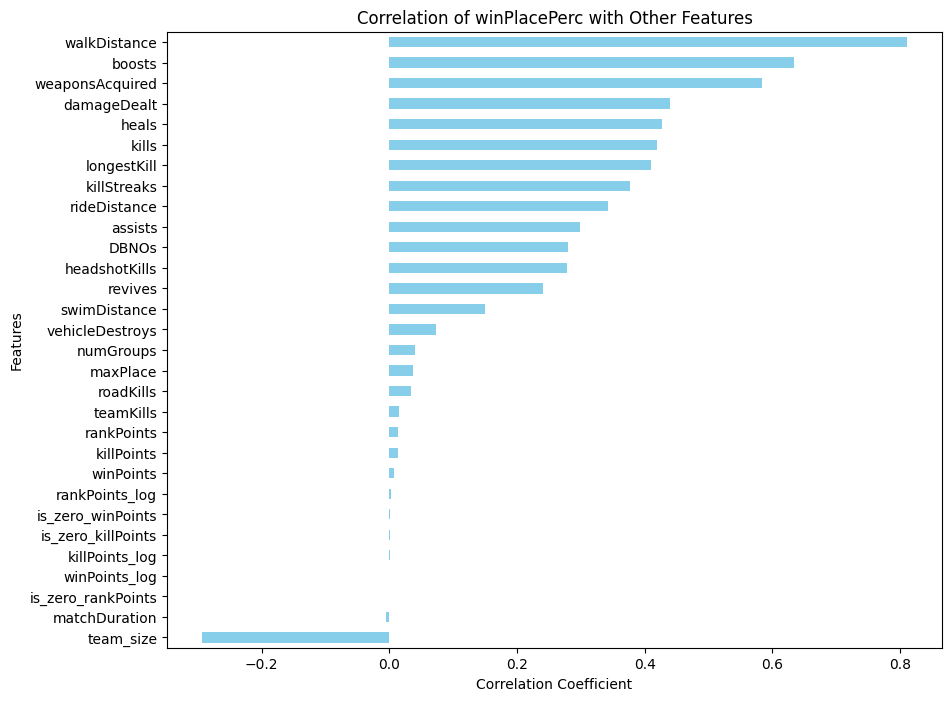

In [14]:
# 숫자형 열만 선택
numeric_train = train.select_dtypes(include=[np.number])

# 타깃 변수 'winPlacePerc'와 나머지 숫자형 변수 간의 상관관계 계산
target_corr = numeric_train.corr()['winPlacePerc'].sort_values(ascending=False)

# 타깃 변수 자신과의 상관관계 제외
target_corr_df = target_corr.drop('winPlacePerc')

# 시각화
plt.figure(figsize=(10, 8))
target_corr_df.plot(kind='barh', color='skyblue')
plt.title("Correlation of winPlacePerc with Other Features")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # 가장 상관관계가 높은 변수를 위에 두기 위해 축 반전
plt.show()

In [53]:
low_corr_columns = target_corr[abs(target_corr) < 0.05].index
train = train.drop(columns=low_corr_columns)

# 삭제된 열 목록 확인
print("삭제된 열:", low_corr_columns)
print("남은 열:", train.columns)

삭제된 열: Index(['numGroups', 'maxPlace', 'roadKills', 'teamKills', 'rankPoints',
       'killPoints', 'winPoints', 'rankPoints_log', 'is_zero_winPoints',
       'is_zero_killPoints', 'killPoints_log', 'winPoints_log',
       'is_zero_rankPoints', 'matchDuration'],
      dtype='object')
남은 열: Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchType', 'revives',
       'rideDistance', 'swimDistance', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPlacePerc', 'team_size'],
      dtype='object')


모든 속성 포함: Weighted RMSE across all match types: 0.1453942942496193  상관계수 |0.05|이상 속성만 포함:                       0.15374351626653926  
-> 모든 속성 포함



killPlace: 매치내 킬 기반 순위이기에 (-)방향으로 상관관계 나타남  
matchDuration: 해당 매치의 지속시간 (플레이어와 무관)  
3개의 points속성: 해당플레이어에게 부여된 점수  
winpoints: 승리기반의 외부 점수
killpoints: 킬수 기반의 외부 점수  
rankpoints: 승리+킬수 기반의 외부점수


walkDistance가 가장 강한 상관관게를 보임 -> 숨어서 다른 생존자들이 탈락하길 기다리는 전략보다, 적극적으로 움직이는 전략이 좋음  
boosts, weaponsacquires 역시 강한 상관관계를 보임 -> 적극적으로 움직이며 아이템을 얻는 것이 좋음


결측치 제거  
KillPlace 속성 삭제  
MatchTypr별로 데이터 분리  
팀 멤버수 속성 추가


# 2. 베이스 라인 모델

모든 매치타입 한번에 입력 

In [31]:
from sklearn.model_selection import train_test_split


X = train.drop(columns=['winPlacePerc'])
y = train['winPlacePerc']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형 회귀 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 검증 세트 예측 및 평가 (RMSE 계산)
y_pred = lin_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Baseline Linear Regression RMSE:", rmse)


Baseline Linear Regression RMSE: 0.1490401470357867


매치타입별 학습

In [50]:
def calculate_weighted_rmse(y_true_solo, y_pred_solo, y_true_duo, y_pred_duo, y_true_squad, y_pred_squad):
    # 각 검증 세트의 RMSE 계산
    rmse_solo = mean_squared_error(y_true_solo, y_pred_solo, squared=False)
    rmse_duo = mean_squared_error(y_true_duo, y_pred_duo, squared=False)
    rmse_squad = mean_squared_error(y_true_squad, y_pred_squad, squared=False)
    
    # 각 매치타입 검증 세트의 크기 계산
    n_solo = len(y_true_solo)
    n_duo = len(y_true_duo)
    n_squad = len(y_true_squad)
    total_n = n_solo + n_duo + n_squad

    # 가중 평균 RMSE 계산
    weighted_rmse = (rmse_solo * n_solo + rmse_duo * n_duo + rmse_squad * n_squad) / total_n
    return weighted_rmse

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_solo = solo_train.drop(columns=['winPlacePerc', 'matchType'])
y_solo = solo_train['winPlacePerc']
X_duo = duo_train.drop(columns=['winPlacePerc', 'matchType'])
y_duo = duo_train['winPlacePerc']
X_squad = squad_train.drop(columns=['winPlacePerc', 'matchType'])
y_squad = squad_train['winPlacePerc']

# Solo 검증 세트
X_solo_train, X_solo_val, y_solo_train, y_solo_val = train_test_split(X_solo, y_solo, test_size=0.2, random_state=42)
solo_model = LinearRegression()
solo_model.fit(X_solo_train, y_solo_train)
y_solo_val_pred = solo_model.predict(X_solo_val)

# Duo 검증 세트
X_duo_train, X_duo_val, y_duo_train, y_duo_val = train_test_split(X_duo, y_duo, test_size=0.2, random_state=42)
duo_model = LinearRegression()
duo_model.fit(X_duo_train, y_duo_train)
y_duo_val_pred = duo_model.predict(X_duo_val)

# Squad 검증 세트
X_squad_train, X_squad_val, y_squad_train, y_squad_val = train_test_split(X_squad, y_squad, test_size=0.2, random_state=42)
squad_model = LinearRegression()
squad_model.fit(X_squad_train, y_squad_train)
y_squad_val_pred = squad_model.predict(X_squad_val)

# 가중 평균 RMSE 계산 함수 호출
weighted_rmse = calculate_weighted_rmse(y_solo_val, y_solo_val_pred, y_duo_val, y_duo_val_pred, y_squad_val, y_squad_val_pred)
print("Weighted RMSE across all match types:", weighted_rmse)




Weighted RMSE across all match types: 0.1455938048336897
